In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
books = pd.read_csv("clean_books.csv")

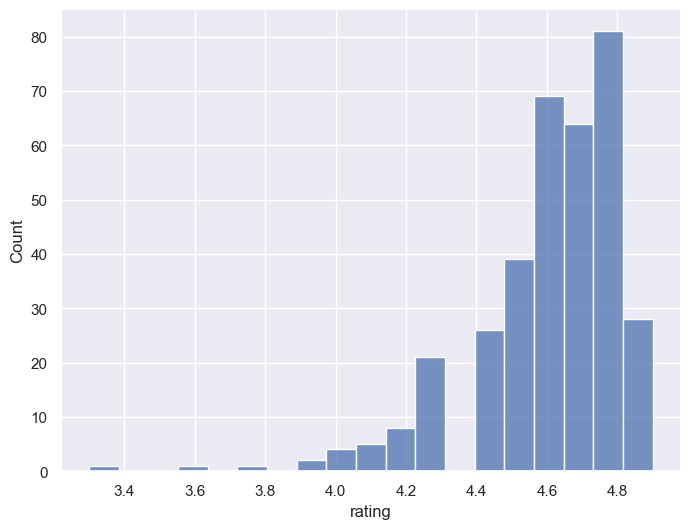

In [240]:
sns.histplot(data=books , x='rating')
plt.show()

In [241]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [242]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64

In [243]:
books['genre'].value_counts()

Non Fiction    179
Fiction        131
Childrens       40
Name: genre, dtype: int64

In [244]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64

# 1

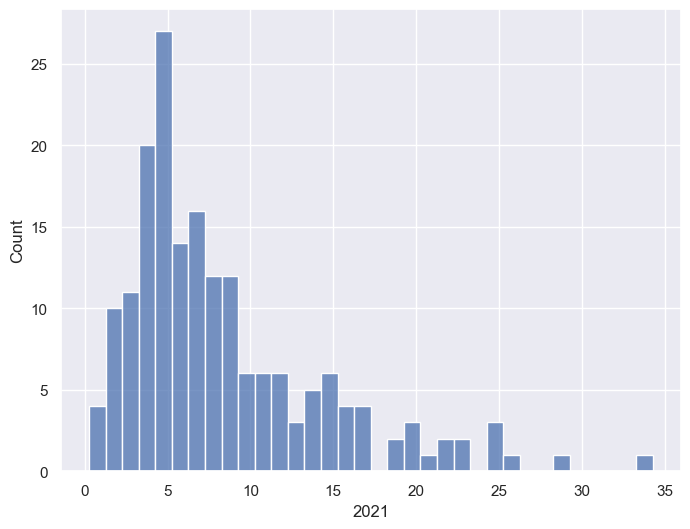

In [245]:
unemployment = pd.read_csv("clean_unemployment.csv")
sns.histplot(data=unemployment , x='2021' , binwidth = 1)
plt.show()

In [246]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [247]:
books["year"] = books["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

# Validating categorical data

In [248]:
books["genre"].isin(["Fiction" , "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [249]:
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [250]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [251]:
books["year"].min()

2009

In [252]:
books["year"].max()

2019

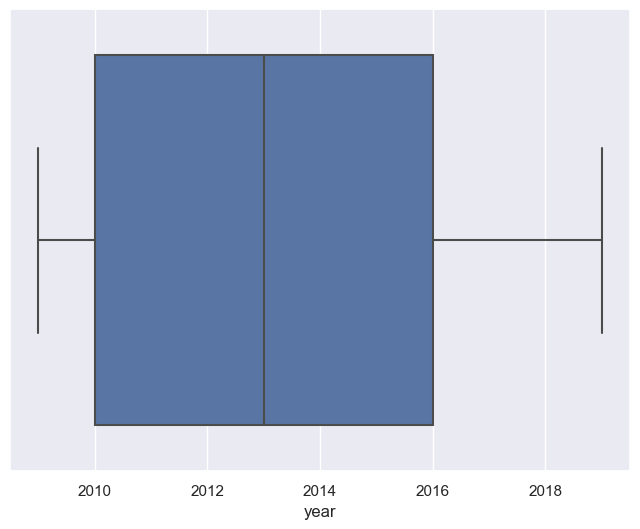

In [253]:
sns.boxplot(data=books , x = "year")
plt.show()

<AxesSubplot:xlabel='year', ylabel='genre'>

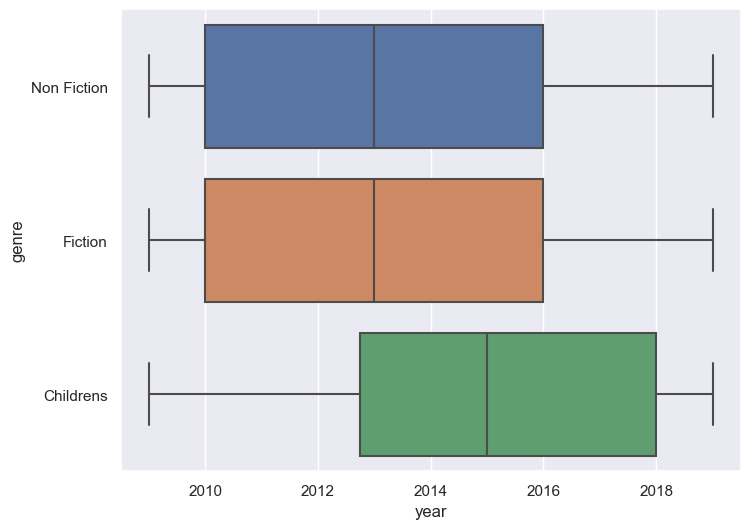

In [254]:
sns.boxplot(data = books , x="year" , y ="genre")

# 2

In [255]:
unemployment = pd.read_csv("clean_unemployment.csv")
not_oceania = ~unemployment['continent'].isin(["Oceania"])
not_oceania

0       True
1       True
2       True
3       True
4       True
       ...  
177    False
178     True
179     True
180     True
181     True
Name: continent, Length: 182, dtype: bool

# 3

In [256]:
unemployment["2021"].min()


0.26

In [257]:
unemployment["2021"].max()

33.56

<AxesSubplot:xlabel='2021', ylabel='continent'>

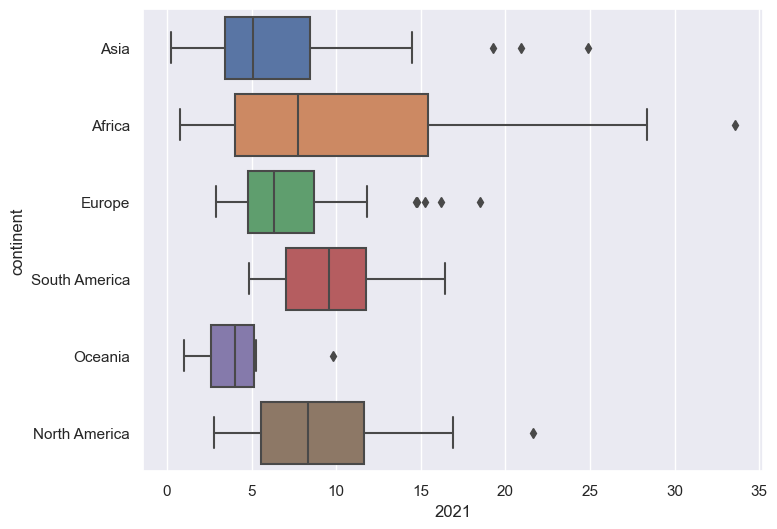

In [258]:
sns.boxplot(data=unemployment , x = "2021" , y="continent")

# Exploring groups of data

In [259]:
books.groupby("genre").mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [260]:
books.agg(["mean" , "std"])

/var/folders/4j/bnvctt7152z6l5l6szd4m7wh0000gn/T/ipykernel_49443/1965544463.py:1: FutureWarning: ['name', 'author', 'genre'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  books.agg(["mean" , "std"])


,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [261]:
books.agg({"rating": ["mean", "std"] , "year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [262]:
books.groupby("genre").agg(mean_rating=("rating", "mean"),
 std_rating = ("rating" , "std"),
 median_year =("year" , "median")
                          )

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


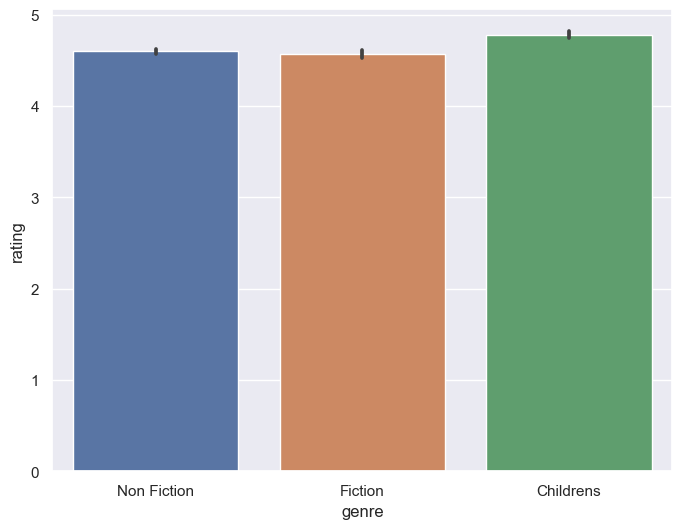

In [263]:
sns.barplot(data=books, x = "genre" ,y = "rating")
plt.show()

# 4

In [264]:
unemployment.agg(["mean" , "std"])

/var/folders/4j/bnvctt7152z6l5l6szd4m7wh0000gn/T/ipykernel_49443/2501974079.py:1: FutureWarning: ['country_code', 'country_name', 'continent'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  unemployment.agg(["mean" , "std"])


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [265]:
unemployment.groupby("continent").agg(["mean" , "std"])

/var/folders/4j/bnvctt7152z6l5l6szd4m7wh0000gn/T/ipykernel_49443/564087925.py:1: FutureWarning: ['country_code', 'country_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  unemployment.groupby("continent").agg(["mean" , "std"])


2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

# 5

In [266]:

continent_summary = unemployment.groupby("continent").agg(mean_rate_2021=("2021" , "mean"),
                                                         std_rate = ("2021" , "std"))
continent_summary


,mean_rate_2021,std_rate
continent,,
Africa,10.473585,8.131636
Asia,6.906170,5.414745
Europe,7.414872,3.947825
North America,9.155000,5.076482
Oceania,4.280000,2.671522
South America,9.924167,3.611624


# 6

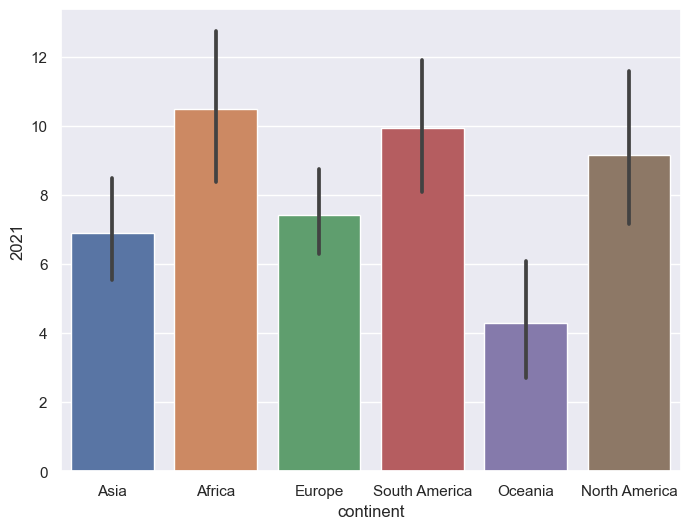

In [267]:
sns.barplot(data=unemployment, x = "continent" ,y = "2021")
plt.show()

In [268]:
salaries = pd.read_csv("ds_salaries_clean.csv")


In [269]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


In [270]:
threshold = len(salaries) * 0.05
print(threshold)

30.35


In [271]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [272]:
salaries.dropna(subset = cols_to_drop , inplace = True)

In [273]:
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

Index([], dtype='object')


In [274]:
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

In [275]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


In [276]:
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
print(salaries_dict)

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}


In [277]:
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


# 7

In [278]:
planes = pd.read_csv("Airlines_unclean.csv" , index_col = 0)
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [279]:
threshold = len(planes) * 0.05
print(threshold)

533.0


In [280]:
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
print(cols_to_drop)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')


In [281]:
planes.dropna(subset = cols_to_drop , inplace = True)

In [282]:
cols_with_missing_values = planes.columns[planes.isna().sum() > 0]
print(cols_with_missing_values)

Index(['Additional_Info', 'Price'], dtype='object')


In [283]:
for col in cols_with_missing_values[:-1]:
    planes[col].fillna(planes[col].mode()[0])

In [284]:
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


# Strategies for remaining missing data.

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


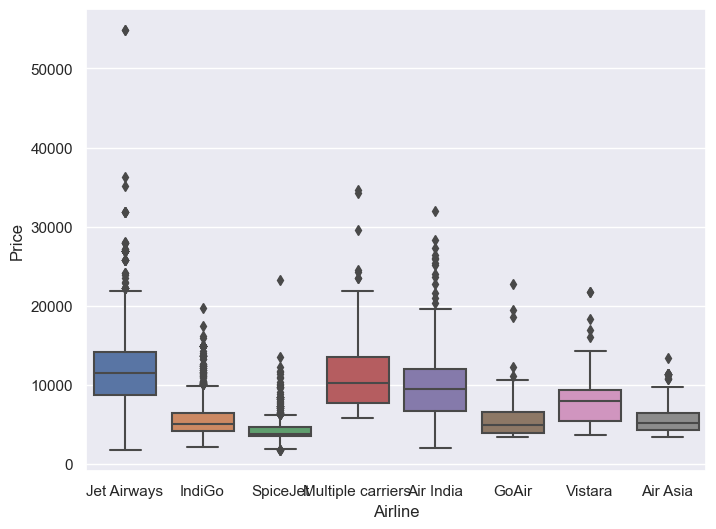

In [285]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')
sns.set(rc={"figure.figsize":(8, 6)}) #width=8, #height=6
plt.show()


# 8

In [286]:
planes = planes.drop(columns = ['Additional_Info'])
planes_dict = planes.groupby("Airline")["Price"].median().to_dict()


print(planes_dict)


{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}


In [287]:
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(planes_dict))
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


# WORKING WITH CATEGORICAL DATA

In [288]:
salaries = pd.read_csv("ds_salaries_clean.csv")
print(salaries.select_dtypes("object").head())

                  Designation Experience Employment_Status Employee_Location  \
0              Data Scientist        Mid                FT                DE   
1  Machine Learning Scientist     Senior                FT                JP   
2           Big Data Engineer     Senior                FT                GB   
3        Product Data Analyst        Mid                FT                HN   
4   Machine Learning Engineer     Senior                FT                US   

  Company_Size  
0            L  
1            S  
2            M  
3            S  
4            L  


In [289]:
print(salaries["Designation"].value_counts())

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [290]:
print(salaries["Designation"].nunique())

50


In [291]:
salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [292]:
salaries["Designation"].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [293]:
job_categories = ["Data Science", "Data Analytics" , "Data Engineering" , "Machine Learning", "Managerial", "Consultant"]

In [294]:
data_science = "Data Scientist|NLP"
data_analyst = "Ana;yst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Directore|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

In [295]:
conditions = [
(salaries ["Designation"].str.contains(data_science)), 
    (salaries["Designation"].str.contains(data_analyst)), 
    (salaries["Designation"].str.contains(data_engineer)), 
    (salaries["Designation"].str.contains(ml_engineer)), 
    (salaries["Designation"].str.contains(manager)), 
    (salaries["Designation"].str.contains(consultant))
]
conditions

[0       True
 1      False
 2      False
 3      False
 4      False
        ...  
 602    False
 603    False
 604    False
 605    False
 606    False
 Name: Designation, Length: 607, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 602    False
 603    False
 604    False
 605    False
 606    False
 Name: Designation, Length: 607, dtype: bool,
 0      False
 1      False
 2       True
 3      False
 4      False
        ...  
 602     True
 603     True
 604    False
 605    False
 606    False
 Name: Designation, Length: 607, dtype: bool,
 0      False
 1       True
 2       True
 3      False
 4       True
        ...  
 602    False
 603    False
 604    False
 605    False
 606     True
 Name: Designation, Length: 607, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 602    False
 603    False
 604    False
 605    False
 606    False
 Name: Designation, Length: 607, dtype: bool,


In [296]:
import numpy as np
salaries["Job_Category"] = np.select(conditions, job_categories, default = "Other")
salaries["Job_Category"]

0          Data Science
1      Machine Learning
2      Data Engineering
3                 Other
4      Machine Learning
             ...       
602    Data Engineering
603    Data Engineering
604               Other
605               Other
606    Machine Learning
Name: Job_Category, Length: 607, dtype: object

In [297]:
print(salaries[["Designation", "Job_Category"]].head())

                  Designation      Job_Category
0              Data Scientist      Data Science
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst             Other
4   Machine Learning Engineer  Machine Learning


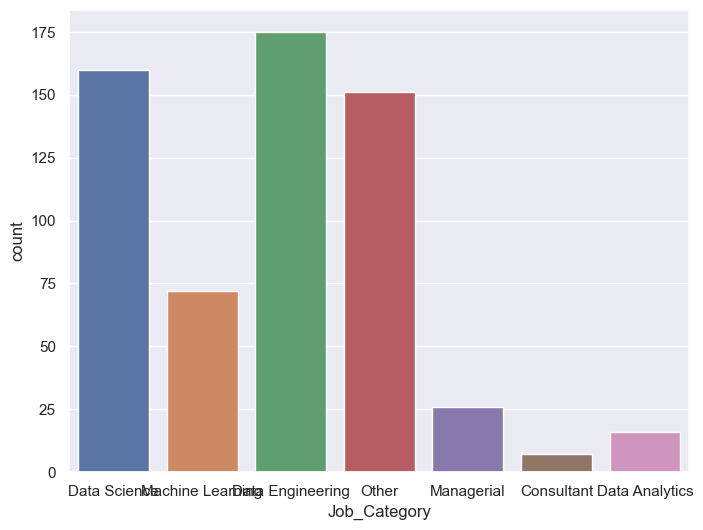

In [298]:
sns.countplot(data=salaries, x="Job_Category")
plt.show()

In [299]:
# planes = pd.read_csv("Airlines_unclean.csv")
# non_numeric = planes.select_dtypes("object")
# for col in non_numeric.columns:
#     print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

In [300]:
# planes["Duration"].head()

# 9

In [301]:
# import numpy as np
# # values = ["0h", "1h" , "2h" , "3h" , "4h" ,"5h", "6h", "7h" , "8h","9h", "10h","11h","12h","13h","14h", "15h", "16h"]




# short_flights = "0h|1h|2h|3h|4h"
# medium_flights = "5h|6h|7h|8h|9h"
# long_flights = "10h|11h|12h|13h|14h|15h|16h"

# conditions = [
#     (planes["Duration"].str.contains(short_flights)),
#     (planes["Duration"].str.contains(medium_flights)),
#     (planes["Duration"].str.contains(long_flights))
# ]

# values = [short_flights, medium_flights, long_flights]


# planes['Duration_Category'] = np.select(conditions, values, default='Other')
# planes['Duration_Category']
# # conditions